# <u>Business Data Science Project:Optimizing Marketing Campaign</u>

##  PROBLEM STATEMENT

You have been tasked with a crucial project for a leading marketing company, where you are working on
behalf of a retail business client. Utilizing the data related to customer characteristics and their reactions to
previous marketing campaigns, your objective is to predict customer reactions to the upcoming fifth
marketing campaign. This information will be used to allocate resources effectively, ensuring the success of
the marketing efforts. By applying data science techniques to analyze the data, you have the opportunity to
provide valuable insights and drive success for the company.

In practice:
In practice, this project involves a supervised machine learning classification task, with the target being the
outcome of the fifth marketing campaign. The data analysis is performed in two stages, and as a result, there
are two sets of data:

• The first set, referred to as the "training set," consists of customer data from past marketing
campaigns (1 through 4) and the current fifth campaign, for which feedback has already been
collected. The objective is to develop a predictive model (classifier) that accurately predicts the
outcome of the 5th campaign based on customer characteristics and past reactions to previous
campaigns.

• The second set, referred to as the « test set », contains data from customers who have not yet been
targeted by the fifth campaign. The goal is to use the predictive model developed in the first stage
(classifier) to identify which of these customers are likely to be interested in the fifth campaign, so
that resources can be allocated effectively.

Dictionary of variables:
- birth: The year the customer was born
- education: The highest level of education completed by the customer
- marital_status: The marital status of the customer
- income: The yearly household income of the customer
- number_of_children: The number of children in the customer's household
- days_since_last_purchase: The number of days that have passed since the customer's last purchase
- customer_enrollment_date: The date on which the customer enrolled with the company
- customer_complaint_status: Indicates whether the customer has made a complaint within the last 2 years (1) or not (0)
- discounted_purchases: The number of purchases made using a discount
- website_purchases: The number of purchases made through the company's website
- catalogue_purchases: The number of purchases made using a catalogue
- store_purchases: The number of purchases made directly in stores
- web_visits_month: The number of visits to the company's website in the last month 
- campaign1_accepted: Indicates whether the customer accepted the offer of the first campaign (1) or not (0)
- campaign2_accepted: Indicates whether the customer accepted the offer of the second campaign (1) or not (0)
- campaign3_accepted: Indicates whether the customer accepted the offer of the third campaign (1) or not (0)
- campaign4_accepted: Indicates whether the customer accepted the offer of the fourth campaign (1) or not (0)
- campaign5_accepted (target variable) : Indicates whether the customer accepted the offer of the fifth campaign (1) or not (0)

## Goal of the project

🎯 **Predict if the cutsomer accepts the offer of the new (5th) marketing campaign based on historical data such as customer profiles or characteristics and also reactions to past campaign.**

# 1. Loading packages and data

<u>Loading required packages</u>

Comments highlighted by using **#**

Loading the following **packages**
- pandas (Data analysis and manipulation tool)
- numpy (Numerical computing tool)
- matplotlib.pyplot (Data visualizations tool)
- seaborn (Data visualizations tool)
- random (Tool to Generate pseudo-random numbers)

In [4]:
#Data analysis and manipulation tool
import pandas as pd
#Numerical computing tool
import numpy as np
#Data visualizations tool
import matplotlib.pyplot as plt
#Data visualizations tool
import seaborn as sns
#Tool to Generate pseudo-random numbers
import random 
#Library used for classification
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,recall_score,precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sb

Checking the version of your **all packages* to ensure the library is loaded

In [5]:
pd.__version__
#np.__version__
#sns.__version__


'1.4.4'

<u>Loading data in a csv file</u>

Creating a **string with the path** to your past customer data using a **raw string** ==> Reminder : r or R +"...``\``...``\``..."

In [6]:
#path_data of customer's train file
path_data = r"D:\ESSEC\Academics\M2 T2\Business Data Science\Practice\Optimizing Marketing through Customer Targeting\train_marketing.csv"

**Load the CSV** into a Pandas DataFrame by using a Pandas function where you will specify the **index column**.
Because the identification of the customers are in a column named **'id'**, it is relevant to use this column as an index.

In [7]:
data = pd.read_csv(path_data)

# 2. Understanding data and first transformations/cleaning

<u>Columns</u>

Get the **column labels** of the DataFrame.

In [8]:
data.columns

Index(['ID', 'birth', 'education', 'marital_status', 'income',
       'number_of_children', 'days_since_last_purchase',
       'customer_enrollment_date', 'customer_complaint_status',
       'discounted_purchases', 'website_purchases', 'catalogue_purchases',
       'store_purchases', 'web_visits_month', 'campaign1_accepted',
       'campaign2_accepted', 'campaign3_accepted', 'campaign4_accepted',
       'campaign5_accepted'],
      dtype='object')

<u>Shape</u>

In [377]:
data.shape

(1680, 19)

1680 represents that we have data for 1680 customers and 18 shows the number of parameters such as birth, education, marital status and remaining as in the index output.

<u>Checking first few and last few rows of data</u>

In [378]:
data.head(5)


,ID,birth,education,marital_status,income,number_of_children,days_since_last_purchase,customer_enrollment_date,customer_complaint_status,discounted_purchases,website_purchases,catalogue_purchases,store_purchases,web_visits_month,campaign1_accepted,campaign2_accepted,campaign3_accepted,campaign4_accepted,campaign5_accepted
0,10972,1949.0,Graduation,Widow,72298.0,0,52,10-03-2014,0,1,4,3,6,1,0,0,0,1,1
1,55,1963.0,Graduation,Together,56253.0,1,83,07-12-2012,0,4,7,2,9,6,0,0,0,0,0
2,1581,1980.0,Graduation,Married,37406.0,1,18,10-10-2013,0,1,1,0,2,8,0,0,0,0,0
3,6318,1988.0,Graduation,Married,68487.0,0,48,13-01-2013,0,1,9,7,13,4,0,0,0,0,0
4,3332,1985.0,Graduation,Single,29760.0,1,87,29-08-2012,0,4,3,1,4,8,0,0,0,0,0


In [379]:
data.tail(5)


,ID,birth,education,marital_status,income,number_of_children,days_since_last_purchase,customer_enrollment_date,customer_complaint_status,discounted_purchases,website_purchases,catalogue_purchases,store_purchases,web_visits_month,campaign1_accepted,campaign2_accepted,campaign3_accepted,campaign4_accepted,campaign5_accepted
1675,1048,1972.0,Master,Married,35641.0,1,11,14-07-2013,0,2,3,1,4,7,0,0,0,0,0
1676,8439,1964.0,Graduation,Together,63404.0,2,97,06-06-2014,0,2,6,3,4,4,1,0,0,0,0
1677,9999,1965.0,Graduation,Together,75276.0,0,2,27-09-2012,0,1,9,4,9,5,0,0,0,0,0
1678,3412,1951.0,Master,Married,67381.0,1,67,15-01-2013,0,4,2,2,9,7,0,0,0,1,0
1679,5067,1994.0,Graduation,Together,80134.0,0,11,14-02-2014,0,1,2,7,11,5,1,1,0,1,1


<u>Checking for missing data and data types of variables for any variables</u>

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1680 non-null   int64  
 1   birth                      1646 non-null   float64
 2   education                  1680 non-null   object 
 3   marital_status             1680 non-null   object 
 4   income                     1662 non-null   float64
 5   number_of_children         1680 non-null   int64  
 6   days_since_last_purchase   1680 non-null   int64  
 7   customer_enrollment_date   1648 non-null   object 
 8   customer_complaint_status  1680 non-null   int64  
 9   discounted_purchases       1680 non-null   int64  
 10  website_purchases          1680 non-null   int64  
 11  catalogue_purchases        1680 non-null   int64  
 12  store_purchases            1680 non-null   int64  
 13  web_visits_month           1680 non-null   int64

In [381]:
data.isnull().sum()

ID                            0
birth                        34
education                     0
marital_status                0
income                       18
number_of_children            0
days_since_last_purchase      0
customer_enrollment_date     32
customer_complaint_status     0
discounted_purchases          0
website_purchases             0
catalogue_purchases           0
store_purchases               0
web_visits_month              0
campaign1_accepted            0
campaign2_accepted            0
campaign3_accepted            0
campaign4_accepted            0
campaign5_accepted            0
dtype: int64

<u> Cheking the percentage of missing values for the variables: income, birth and customer_enrollment_date. </u>

In [382]:
(data.isnull().sum()/data.shape[0]*100)['income']

1.0714285714285714

In [383]:
(data.isnull().sum()/data.shape[0]*100)['customer_enrollment_date']

1.9047619047619049

In [384]:
(data.isnull().sum()/data.shape[0]*100)['birth']

2.0238095238095237

<u> Checking data in education and marital_staus</u>

In [385]:
len( data['marital_status'].unique())

8

In [386]:
data['marital_status'].unique()

array(['Widow', 'Together', 'Married', 'Single', 'Divorced', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [387]:
len( data['education'].unique())

5

In [388]:
data['education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<u> Checking Outliers in data</u>

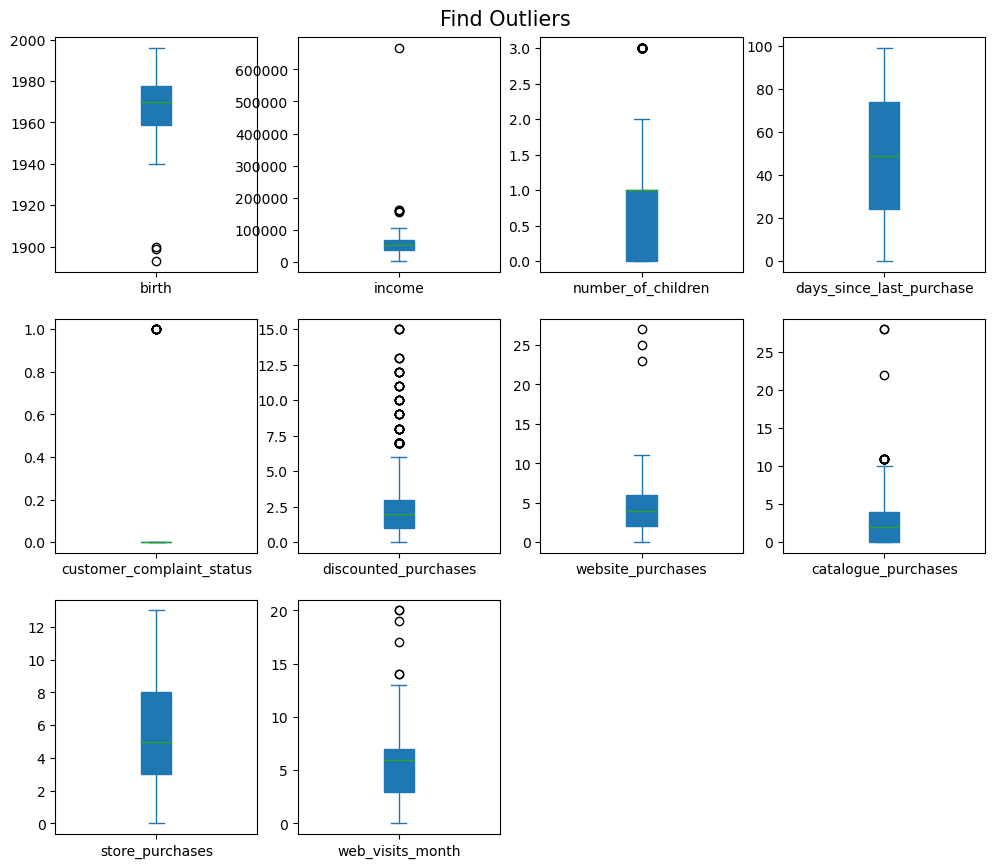

In [389]:
# select columns to plot
df_to_plot = data.drop(columns=['ID','campaign1_accepted', 'campaign2_accepted', 'campaign3_accepted', 'campaign4_accepted', 'campaign5_accepted']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

<u> Distribution of income </u>

Text(4.944444444444445, 0.5, 'count')

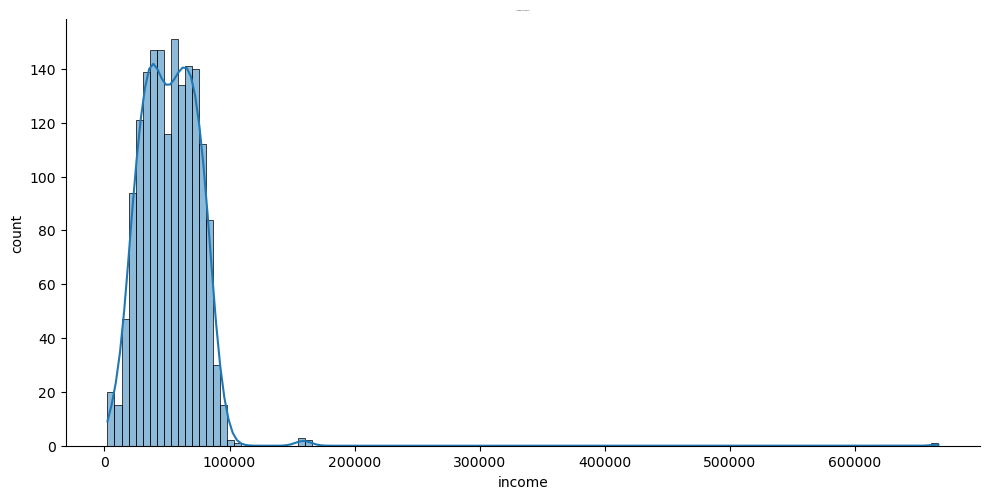

In [390]:
#plotting displot for income

#uncomment the lines of code given below
sns.displot(data['income'], kde=True, height=5, aspect=2)
plt.title('Income distribution', size=1)
plt.ylabel('count')

<u> Distribution of birth year </u>

Text(4.944444444444445, 0.5, 'count')

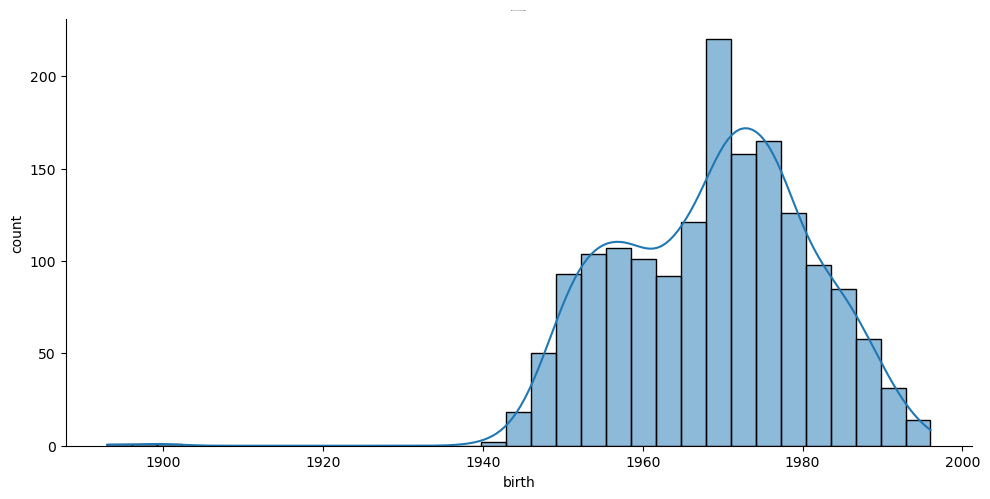

In [12]:
#plotting displot for birth year of customers

#uncomment the lines of code given below
sns.displot(data['birth'], kde=True, height=5, aspect=2)
plt.title('Birth Year Customers', size=1)
plt.ylabel('count')

<u>Observations in understanding the data: </u>

1. We have missing data for 3 variables: birth (birthdate) for 34 customers, the income for 18 customers, customer_enrollment_date for 38 customers.

2. There are 3 object columns: education, marital_status and customer_enrollment_date. We will one hot encode education and marital_status later. For the customer_enrollment_date, the year/month/day might reveal important information and hence we will modify it in preprocessing section.

3. There are missing values for the variables: income,customer_enrollment_date and birth, which we will handle in preprocessing section.

4. Income has ~1.07% missing values, customer_enrollment_date and birth has ariund 2% of missing values are not a lot. We could ideally remove these as these are too small compared to entire dataset, but I chose to keep and add the missing values.

5. There are 5 categorgies in varibale 'education'. '2n cycle' and 'Master' means the same thing. We can combine these two categories.

6. There are 8 categories in marital status. We can combine the category 'Alone' with 'Single'. It is not clear from the data that what do the terms 'Absurd', and 'YOLO' actually mean. We can combine these categories to make a new category - 'Others'.

7. Outliers: Remove Outliers: There are many columns having outliers, but most of them seem like natural outliers came from population, whereas the outliers in birth_year seems like entry errors since it's impossible that people who was born before 1900 still alive. Therefore, we will remove the outliers in birth. There is one outlier in income with exceptionally high income> 600K dollars and some >100k dollars. We will remove those customer considering such high income customers are not our target marget.

<u> Descriptive statistics of the numeric features of the data frame </u>

In [392]:
data.describe()

,ID,birth,income,number_of_children,days_since_last_purchase,customer_complaint_status,discounted_purchases,website_purchases,catalogue_purchases,store_purchases,web_visits_month,campaign1_accepted,campaign2_accepted,campaign3_accepted,campaign4_accepted,campaign5_accepted
count,1680.000000,1646.000000,1662.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,5627.155357,1968.863305,52591.399519,0.957738,48.954762,0.008929,2.345238,4.113690,2.658333,5.829762,5.275595,0.060119,0.011310,0.070833,0.072024,0.079762
std,3252.668479,12.001222,26240.963455,0.758513,28.854016,0.094096,1.986818,2.780996,2.896660,3.252095,2.408714,0.237778,0.105775,0.256623,0.258604,0.271005
min,0.000000,1893.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35552.500000,0.000000,24.000000,0.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5536.000000,1970.000000,52192.500000,1.000000,49.000000,0.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8398.250000,1977.750000,69131.500000,1.000000,74.000000,0.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,3.000000,99.000000,1.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations from descriptive statistics of numerical varibales:
    
1. Mean Income of customers is dollar 51855. Also lowest income a customer has is dollar 2447 and highest income a customer has is dollar 98777 ( excluding the outliers). Also a typical customer has income of dollar 51381 yearly. 

2. Average customer has 1 kid and maximum kids customers have is 3. 

3. Average recency or days since last purchase is 48 and maximum nuber of days a customer has waited since last purchase is 99 and minimum is 0. 50% of people wait atleast 49 days to make next purchase. 25% of the people wait atleast 24 days to make a next purchase.

4. All the people are enrolled afte 2012, and since then, average purchase by a customer from catelog is 2, from store is 6 and from website is 4.

<u>Analysis of categorical variables in the dataframe </u>

In [13]:
#cat_cols contain categorical variables
cat_cols=['education', 'marital_status', 'campaign1_accepted','campaign2_accepted', 'campaign3_accepted', 'campaign4_accepted', 'campaign5_accepted','customer_complaint_status' ]

In [14]:
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 40)

Graduation    0.498214
PhD           0.213690
Master        0.170238
2n Cycle      0.092857
Basic         0.025000
Name: education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.266667
Single      0.208333
Divorced    0.100000
Widow       0.035119
Alone       0.001786
YOLO        0.001190
Absurd      0.001190
Name: marital_status, dtype: float64
----------------------------------------
0    0.939881
1    0.060119
Name: campaign1_accepted, dtype: float64
----------------------------------------
0    0.98869
1    0.01131
Name: campaign2_accepted, dtype: float64
----------------------------------------
0    0.929167
1    0.070833
Name: campaign3_accepted, dtype: float64
----------------------------------------
0    0.927976
1    0.072024
Name: campaign4_accepted, dtype: float64
----------------------------------------
0    0.920238
1    0.079762
Name: campaign5_accepted, dtype: float64
----------------------------------------
0    0.991071
1   

Observations from categegorical variable analysis:
1. In education, 2n cycle and Master means the same thing. We can combine these two categories.(Major categories are Gratuated ~ 50%, phd around 21% and masters/2nd cycle around 26%. This implies most people are educated.)

2. There are many categories in marital status. We can combine the category 'Alone' with 'Single'.(Major categories are  Married - 40%, Single/Alone, Couple: 26% , Divorced 10%) This implies majority of our customers are married or couple.

3. It is not clear from the data that what do the terms 'Absurd', and 'YOLO' actually mean. We can combine these categories to make a new category - 'Others'.

4. There are only 13 customers who complained in the last two years. (1670 * 0.0089)

## 3. Preprocessing

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1680 non-null   int64  
 1   birth                      1646 non-null   float64
 2   education                  1680 non-null   object 
 3   marital_status             1680 non-null   object 
 4   income                     1662 non-null   float64
 5   number_of_children         1680 non-null   int64  
 6   days_since_last_purchase   1680 non-null   int64  
 7   customer_enrollment_date   1648 non-null   object 
 8   customer_complaint_status  1680 non-null   int64  
 9   discounted_purchases       1680 non-null   int64  
 10  website_purchases          1680 non-null   int64  
 11  catalogue_purchases        1680 non-null   int64  
 12  store_purchases            1680 non-null   int64  
 13  web_visits_month           1680 non-null   int64

In [16]:
def onehot_encode(df,column):
    df = df.copy()
    dummies= pd.get_dummies(df[column], prefix =column)
    df = pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [17]:
def preprocess_inputs(df):
    df = df.copy()
    
    # dropping ID as it is not useful for prediction of output as each ID respresents different customers
    df = df.drop('ID', axis=1)
    
    # Fill missing income values with column median as data is skewed (has clear outliers)
    df['income'] = df['income'].fillna(df['income'].median())
    
    # Fill missing birth values with column median as data is skewed (has clear outliers)
    df['birth'] = df['birth'].fillna(df['birth'].median())
    
    # customer_enrollment_date encoding
    
    # converting object datatype of enrollment date to datetime
    df['customer_enrollment_date'] = pd.to_datetime(df['customer_enrollment_date'], format="%d-%m-%Y")
    
    # filling missing values with median date
    df['customer_enrollment_date'] = df['customer_enrollment_date'].fillna(df['customer_enrollment_date'].median())
    
    #separating year, month, day from enrollment date
    df['year_enrollment'] =  df['customer_enrollment_date'].apply(lambda x: x.year)
    df['month_enrollment'] = df['customer_enrollment_date'].apply(lambda x: x.month)
    df['day_enrollment'] =  df['customer_enrollment_date'].apply(lambda x: x.day)
    
    # dropping the original customer enrollment date
    df = df.drop('customer_enrollment_date', axis=1)
    
    # Combining 2n cycle & Master as one categorgy 'Masters in variable education
    df["education"].replace("2n Cycle", "Master", inplace=True)
    
    # Combining Alone & Sinle as one categorgy 'Single' in variable marital_status
    df["marital_status"].replace(["Alone",], "Single", inplace=True)
    
    # Combining Yolo & Absurd as one categorgy 'Others' in variable marital_status
    df['marital_status'].replace(["Absurd", "YOLO"], "Others", inplace=True)
        
    # Adding new features
    #Total purchases = sum of all purchases
    platform_col = [col for col in df.columns if 'purchases' in col]
    df['total_purchases'] = df[platform_col].sum(axis = 1) 
    
    # Total no. of campaign accepted by a customer
    campaigns_cols = [col for col in df.columns if 'campaign' in col]
    df['total_campaigns_acc'] =df[campaigns_cols].sum(axis=1)
        
    
    #Removing outliers from the train data
    # removing income outlier
    # removie birth year outlier
    df = df[df.birth >= (df.birth.mean()-3*df.birth.std())]
    df = df[df['income'] <= 100000]  
    
    
    #One-hot encoding
    for column in ['education', 'marital_status']:
        df= onehot_encode(df, column)
        
        
    return df

def split(df):        
    #Split df into X and y
    y = df['campaign5_accepted']
    X =  df.drop('campaign5_accepted', axis=1)
    
    #Train-test split
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)
    
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train))
    X_test = pd.DataFrame(scaler.transform(X_test))
    return X_train,X_test,y_train,y_test,X

In [18]:
# calling pre=processing function on dataframe 'data'
data_preprocessed = preprocess_inputs(data)   
     

In [19]:
 data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 0 to 1679
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   birth                      1670 non-null   float64
 1   income                     1670 non-null   float64
 2   number_of_children         1670 non-null   int64  
 3   days_since_last_purchase   1670 non-null   int64  
 4   customer_complaint_status  1670 non-null   int64  
 5   discounted_purchases       1670 non-null   int64  
 6   website_purchases          1670 non-null   int64  
 7   catalogue_purchases        1670 non-null   int64  
 8   store_purchases            1670 non-null   int64  
 9   web_visits_month           1670 non-null   int64  
 10  campaign1_accepted         1670 non-null   int64  
 11  campaign2_accepted         1670 non-null   int64  
 12  campaign3_accepted         1670 non-null   int64  
 13  campaign4_accepted         1670 non-null   int64

In [20]:
data_preprocessed = data_preprocessed.drop('marital_status_Others', axis=1) 
#Removed the feature as there was no 'Others category' in the education variable of test data
    

In [411]:
X_train,X_test,y_train,y_test,X = split(data_preprocessed)

In [ ]:
# After scaling the mean should be close to zero and variance should be close to 1.

In [412]:
X_train.mean()

0    -5.571439e-15
1    -1.238435e-16
2     4.727351e-16
3     8.547483e-18
4     2.486130e-16
5     4.504048e-17
6    -5.669830e-17
7     1.339106e-17
8     7.578768e-17
9     5.147484e-17
10   -9.926951e-16
11    1.530712e-16
12    3.011563e-16
13    1.496759e-16
14   -1.187633e-13
15   -2.811172e-17
16   -5.793294e-18
17    7.597762e-19
18    3.725753e-16
19   -4.294635e-16
20    2.002960e-16
21    8.091617e-17
22   -2.628826e-16
23   -4.259970e-16
24   -3.855864e-17
25   -2.719999e-16
26   -7.065919e-17
27    3.276535e-17
dtype: float64

In [413]:
X_train.var()

0     1.000856
1     1.000856
2     1.000856
3     1.000856
4     1.000856
5     1.000856
6     1.000856
7     1.000856
8     1.000856
9     1.000856
10    1.000856
11    1.000856
12    1.000856
13    1.000856
14    1.000856
15    1.000856
16    1.000856
17    1.000856
18    1.000856
19    1.000856
20    1.000856
21    1.000856
22    1.000856
23    1.000856
24    1.000856
25    1.000856
26    1.000856
27    1.000856
dtype: float64

In [415]:
y_test

1587    0
1433    0
947     0
1343    0
1020    0
       ..
100     0
603     1
1270    0
676     0
63      0
Name: campaign5_accepted, Length: 501, dtype: int64

## 4. Training & Performace

In [416]:
# function to calculate model performance metrics

def performance_matrix(y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    # plot the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    return acc, precision, recall, f1, cm

Model 1: <u> Decision tree Classifier </u>

In [417]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [418]:
y_pred_decision_tree = clf.predict(X_test)

In [419]:
#predicted output for decision tree model using train data
y_pred_decision_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[Text(0.59375, 0.9545454545454546, 'X[18] <= 1.847\ngini = 0.142\nsamples = 1169\nvalue = [1079, 90]'),
 Text(0.3958333333333333, 0.8636363636363636, 'X[1] <= 1.477\ngini = 0.062\nsamples = 1097\nvalue = [1062, 35]'),
 Text(0.25, 0.7727272727272727, 'X[18] <= 0.322\ngini = 0.024\nsamples = 1049\nvalue = [1036, 13]'),
 Text(0.20833333333333334, 0.6818181818181818, 'gini = 0.0\nsamples = 908\nvalue = [908, 0]'),
 Text(0.2916666666666667, 0.6818181818181818, 'X[1] <= 1.251\ngini = 0.167\nsamples = 141\nvalue = [128, 13]'),
 Text(0.20833333333333334, 0.5909090909090909, 'X[17] <= 2.168\ngini = 0.09\nsamples = 127\nvalue = [121, 6]'),
 Text(0.16666666666666666, 0.5, 'X[9] <= -0.315\ngini = 0.076\nsamples = 126\nvalue = [121, 5]'),
 Text(0.125, 0.4090909090909091, 'X[8] <= 0.501\ngini = 0.271\nsamples = 31\nvalue = [26, 5]'),
 Text(0.08333333333333333, 0.3181818181818182, 'X[0] <= -0.369\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.041666666666666664, 0.22727272727272727, 'gini = 

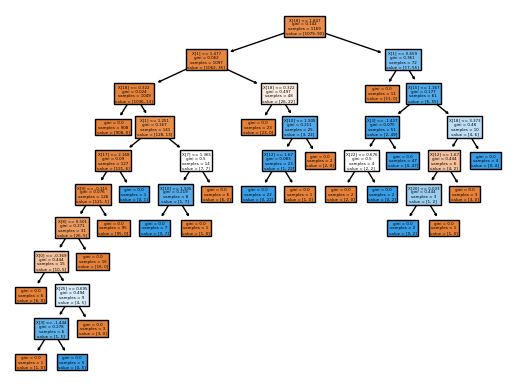

In [420]:
tree.plot_tree(clf,filled=True)

Accuracy: 0.9740518962075848
Precision: 0.8717948717948718
Recall: 0.8095238095238095
F1 Score: 0.8395061728395062


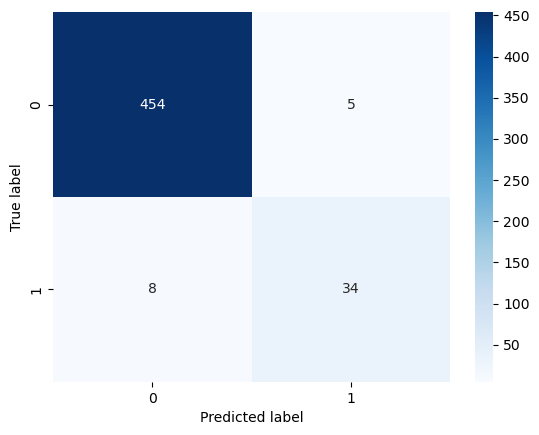

(0.9740518962075848,
 0.8717948717948718,
 0.8095238095238095,
 0.8395061728395062,
 array([[454,   5],
        [  8,  34]], dtype=int64))

In [421]:
performance_matrix(y_pred_decision_tree)

Inference:

- This means that there are 454 true negatives (model predicted no, and it was actually no), 34 true positives (model predicted yes, and it was actually yes),5 false positives (model predicted yes, but it was actually no), and 8 false negatives (model predicted no, but it was actually yes). In this case, we can see that the model is better at predicting the negative class (no) than the positive class (yes), as it has a higher number of true negatives than true positives.

- The metric to look at is not necessarily the accuracy.If the model predicted all values as negatives, it will still have an accuracy of ~ 92%. Hence, the model might not be doing so well.

Model 2: <u> Random Forecast Classifier </u>

- We use now Random Forest Model as they can handle class imbalance by assigning higher weights to the minority class during training. We are using the Random Forest classifier with 500 trees and a balanced class weight to handle the imbalanced data. We are also using the f1 score as the evaluation metric, which is a good choice for imbalanced datasets.

Accuracy: 0.9780439121756487
Precision: 0.8604651162790697
Recall: 0.8809523809523809
F1 Score: 0.8705882352941177


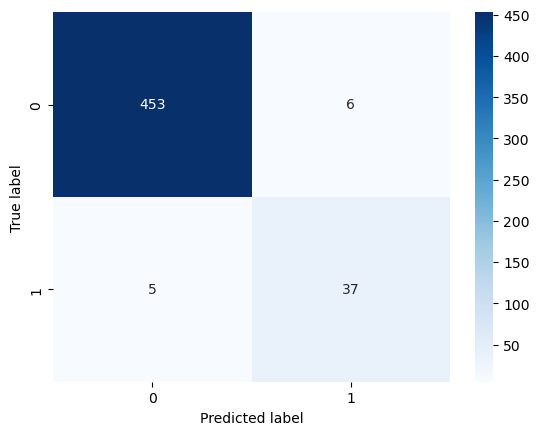

(0.9780439121756487,
 0.8604651162790697,
 0.8809523809523809,
 0.8705882352941177,
 array([[453,   6],
        [  5,  37]], dtype=int64))

In [423]:
# Create a random forest classifier object
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the classifier to the data
rf_clf.fit(X_train, y_train)

# Evaluate the performance of the classifier
y_pred_RF = rf_clf.predict(X_test)

performance_matrix(y_pred_RF)


- We can see that the accuracy remains same but a significant improvement in F1-score. This is a relatively better model for predicting both negative and positive classes (that is whether the customer accepts or reject the marketing campagin 5.

## 5. Prediction of Consumer test data set

In [424]:
#Loading final test data
test_path_data = r"D:\ESSEC\Academics\M2 T2\Business Data Science\Practice\Optimizing Marketing through Customer Targeting\test_marketing.csv"

In [425]:
test_data = pd.read_csv(test_path_data)

In [426]:
clean_test_data= preprocess_inputs(test_data)

In [427]:
scaler = StandardScaler()

In [428]:
scaler.fit_transform(X_train)

array([[ 0.19009918,  1.06796389,  0.04101931, ..., -0.52289624,
        -0.60469348, -0.19065025],
       [-0.24023766,  1.69774085,  1.37300742, ...,  1.9124253 ,
        -0.60469348, -0.19065025],
       [ 1.13684023,  0.45767636, -1.2909688 , ..., -0.52289624,
         1.65373041, -0.19065025],
       ...,
       [-1.70338291,  0.89265849, -1.2909688 , ..., -0.52289624,
        -0.60469348,  5.24520687],
       [ 0.44830129, -1.63395675,  0.04101931, ..., -0.52289624,
        -0.60469348, -0.19065025],
       [-1.10091134,  0.846918  ,  0.04101931, ..., -0.52289624,
         1.65373041, -0.19065025]])

In [429]:
scaled_test_data = pd.DataFrame(scaler.transform(clean_test_data))

C:\Users\91818\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [430]:
y_pred_test = rf_clf.predict(clean_test_data)

C:\Users\91818\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [431]:
# #predicted output using test_data
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 6. Visualization

<u>Correlation between features </u>

<Figure size 3000x2000 with 0 Axes>

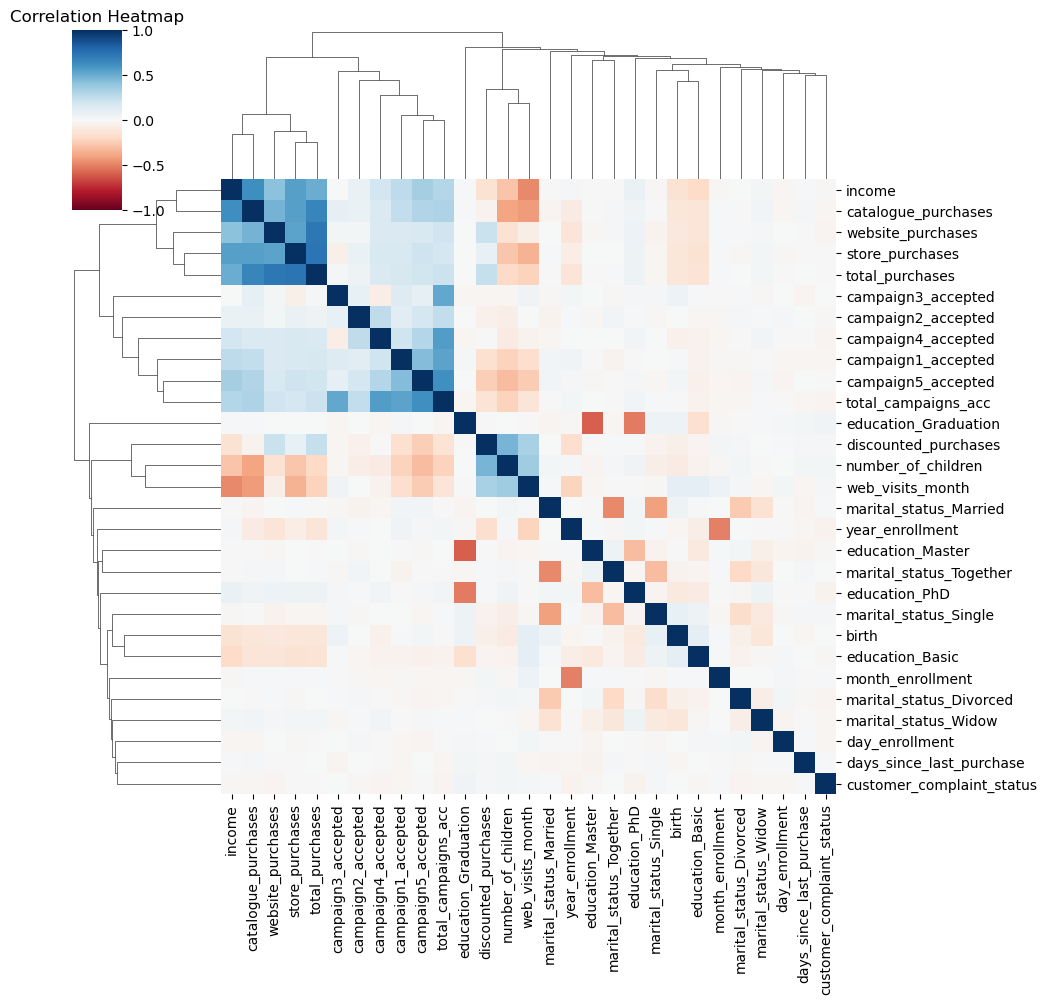

In [432]:
# select columns to plot
df_to_plot = data_preprocessed

plt.figure(figsize = (30, 20))
s = sb.clustermap(df_to_plot.corr(method = 'kendall'),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)

plt.title("Correlation Heatmap")
plt.show()

Inference:
    
- Strong positive correlation among varibales: 1. website-purchases and 2. store purchases and  3. total purchases and 4. income & catalogue purchase 

- Strong correlation between (website vist per month and discounted purchases) and (website vist per month and number of children)

- Strong positive correlation beterrn campaign 1,4 and 5 acceptance

- Customer enrollment day is not related to any other variable


<u>Observations on acceptance rate for each campaign</u>

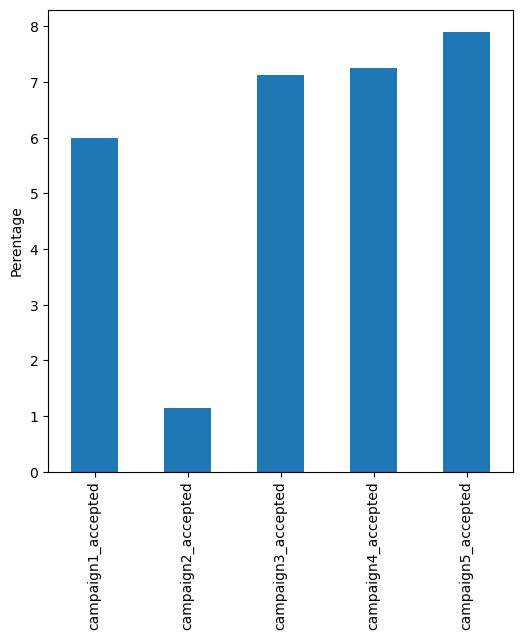

In [433]:
# PLotting the % acceptance for every campaign

Camp_cols=['campaign1_accepted','campaign2_accepted', 'campaign3_accepted', 'campaign4_accepted', 'campaign5_accepted']

success_campaign=(data_preprocessed[Camp_cols].sum()/data_preprocessed.shape[0])*100

# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
plt.show()

Inference:
    
- Campaign 5 has the highest acceptance rate which is around 8%.

- Campaigns 3,4 and 5 have a similar acceptance rate between 7-8%.


<u>Income & Total Acceptance across all 5 campaigns</u>

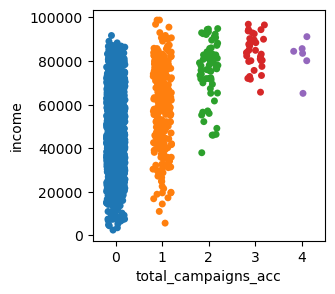

In [434]:
plt.figure(figsize=(3,3))
sns.stripplot(x='total_campaigns_acc', y='income', data=data_preprocessed, jitter=0.2)
plt.show()

Inference:
As income rises, the more likely to accept multiple campaign


<u>Observations on acceptance rate for each campaign according to the income level</u>


- The mean income of customers is close to 52K. Let's divide the income into 2 segments of income>52k and income<52k and see the acceptance rate in each segment.

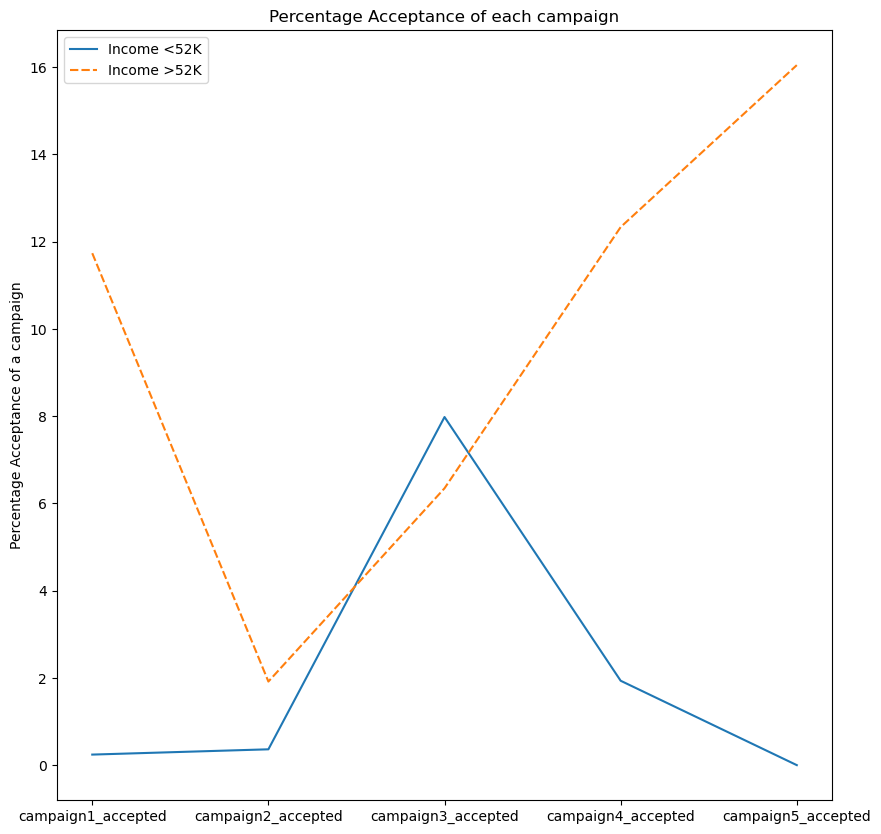

In [435]:
# making dataframes of customers having income <52k and >52K
df1=data[data.income<52000]
df2=data[data.income>52000]

Camp_cols=['campaign1_accepted','campaign2_accepted', 'campaign3_accepted', 'campaign4_accepted', 'campaign5_accepted']

#Calculating success rate of each campaing for both segments 
success_campaign1=pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0])*100, columns=['Income <52K'])

success_campaign2=pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0])*100, columns=['Income >52K'])

df3=pd.concat([success_campaign1, success_campaign2], axis=1)

# plot
plt.figure(figsize=(10,10))
sns.lineplot(data=df3)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()


Inference:
    
- Campaign 1, 4 and 5 are better suited to high income customers
- Only Campaign 3 has similar acceptance rate for both categories


<u>Top 10 Important Factors of Accepting Campaign Offer</u>

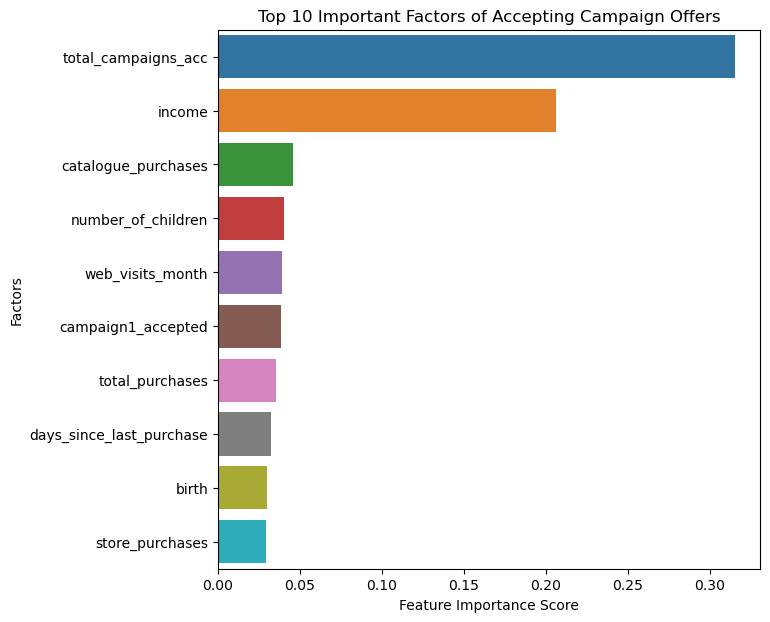

In [436]:
# find feature importance scores
import pandas as pd
feature_imp = pd.Series(rf_clf.feature_importances_, 
        index = list(data_preprocessed.drop('campaign5_accepted',axis=1).columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Factors')
plt.title("Top 10 Important Factors of Accepting Campaign Offers")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

Inference: 
- The total acceptance from all the customers in the past campaign and income are the top important factors behind the prediction. The customers who have accepted the offer in the past are more likely to convert.
- Similary, income is the second major factor for the success of a marketing campaign.

## 7. Recommendations based on observations

1. Utilize the techniques from the 5th campaign due to its highest conversion rate.
2. Implement a loyalty program specifically for customers with higher incomes as they are more likely to convert.
3. There is a strong positive correlation between people and website visits, suggesting the potential to promote children's products on the website.
4. Campaign 3 should be duplicated if targeting all customers regardless of income.
5. Review campaign 2 to determine which elements should be replicated.
6. Since customer complaints are very low, maintain the current level of customer service.
7. Target couple-oriented products as 60% of our customer base consists of married or coupled individuals.
8. The past customers who have accepted teh offer must be pampered, may be with more disctounts, better services etc.


